In [2]:
import pandas as pd
import missingno as msno
import dns.reversename

# The Data Science Process

### 1. Ask a Question
* What is your goal?
* What would you do if you had all data?
* What do you want to predict or estimate?
* What do you want to understand or gain insight? 

### 2. Collect Data
* What is the source of data?
* Are you missing any data?
* Which points of data are relevant?
* How can you best sample the data?  

### 3. Explore Data
* What are anomalies in your data?
* What are patterns in your data?
* What is considered normal for your data?
* What plots best represent your data?

### 4. Model Data
* What features are important to your data?
* Why are these feature important to your data?
* How can you best model your data?

### 5. Communicate & Visualize Results
* What did you learn?
* Do the results make sense?
* Do you need more data?'


#### Repeat Steps When Necessary

## 1. Ask a Question

After an initial examinatio nof the dataset, you need to form a question that data is able to answer. If your data is unable to answer that question, you either a) gather new data or b) form a new question. If you do not think, you have enough domain expertise to tackle the dataset or form an appropriate question. Then, you need to figure out what information you do need to tackle this problem. 

It's important that you have all the information and context you need to solve the question.

### Exercise 1

You are presented with a dataset below. What questions can your formulate to ask based on the dataset provided?

### Dataset Description

Malicious websites are of great concern due it is a problem to analyze one by one and to index each URL in a black list.

URL: it is the anonimous identification of the URL analyzed in the study

URL_LENGTH: it is the number of characters in the URL

NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”

CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).

SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.

CONTENT_LENGTH: it represents the content size of the HTTP header.

WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).

WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).

WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM

WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed

TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client

DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP

REMOTE_IPS: this variable has the total number of IPs connected to the honeypot

APP_BYTES: this is the number of bytes transfered

SOURCE_APP_PACKETS: packets sent from the honeypot to the server

REMOTE_APP_PACKETS: packets received from the server

APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server

DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server

TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

References:
*https://github.com/urcuqui/WhiteHat/tree/master/Research/Web%20security

## Collect Data

I have already collected the data. It is important to think through what data you need and find ways to get that data.

## Explore Data

Exploratory Data Analysis (EDA) is a crucial component of data science which allows you to develop the gist of what your data looks like and what kinds of questions might be answed by them.

EDA is important because it allows the investigator to make critical decisions about what is interesting to pursue and what probably isn't worth following up on and thus building a hypothesis using the relationships between vairables.

### Why Do EDA?

You perform exploratory data analysis in order to learn more about the data before you ever run a machine learning model. It helps create a mental model of the data so when you investigate, you'll be better able to recognize your own bias.

### EDA

The goal of EDA is to discover patterns in the data. This is a fundamental first step towards predictive modeling or as an end goal itself.

Tips for Performing a Good EDA:
* Understand the context
* Use graphical representaitons of data
* Develop models in an interative process
* Question the data
* Don't think of EDA as only the initial step

### EDA Checklist

* What question(s) are you trying to solve (or prove wrong)?
* What kind of data do you have and how do you treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?


In [3]:
df = pd.read_csv('data/dataset.csv')

In [4]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [6]:
df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

We have about so many different features, most of these features . Let's get to know more about each one of our features.

### Exercise 2

1. How many total rows and columns do we have?

2. How many of those rows are missing values?

3. How many unique items there are in each feature?

4. How many occurences of each value are there for anyone of the features?

5. What are the qualitiative features?

6. What are the quantitiative features?

When observing the data we start to explore the categories we can place each of the features. In this dataset it appears we might have to create our own.

### What is missing from the data? How can we deal with it?

How do you predict/utilize/examine missing data? I don't know either. Let's first see if there is any missing data.

I rely on a library called `missingno`. `missingno` offers a nice way to visualize the distribution of null values. 

<AxesSubplot:>

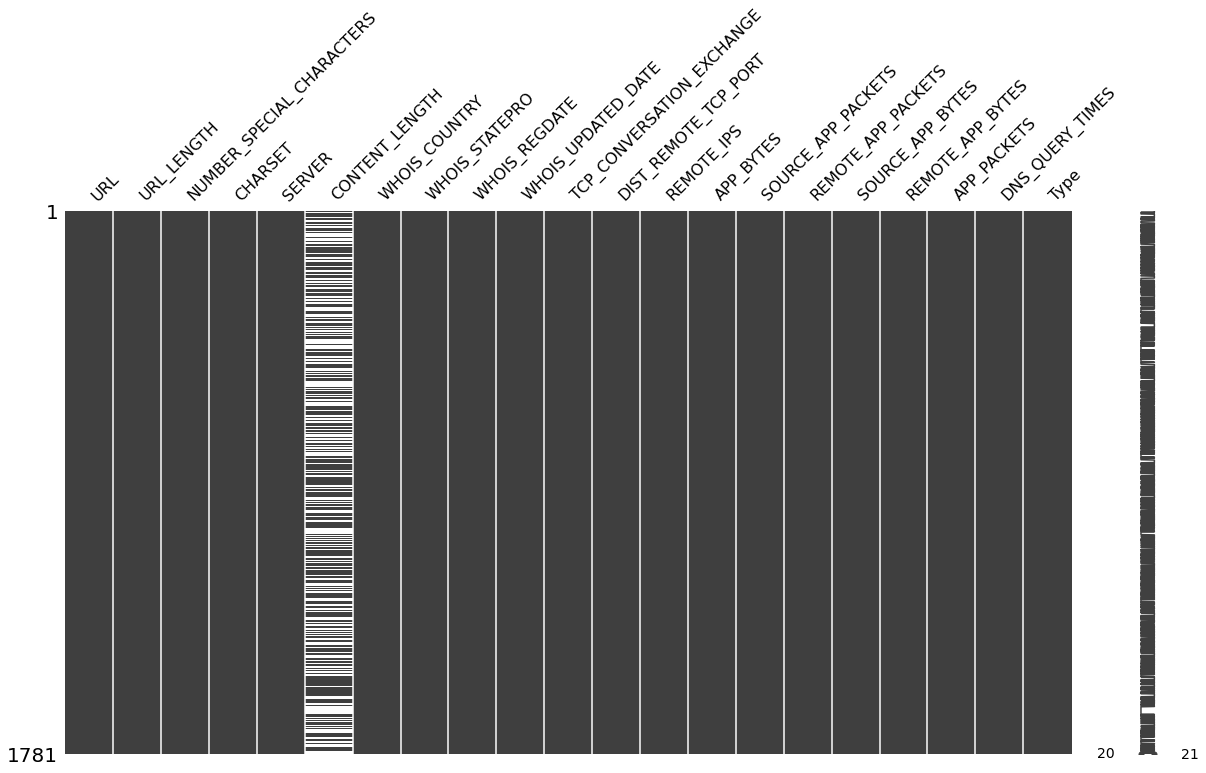

In [7]:
msno.matrix(df, figsize=(20,10))

The missingno library is a great quick way to quickly visually check for holes in a dataset, it detects where NaN values (or no values) appear and highlights them. White lines indicate missing values.

It appears that `CONTENT_LEGTH` is missing values some values, but that is all.

What are your options when dealing with missing data?

The quickest and easiet way would be to remove every row with missing values. Or remove the columns entirely. 

This can be a problem. Machine learning models like more data. Removing large amounts of data will likely decrease the capability of our model.

The bar chart gives you an idea about how many missing values are in each column.

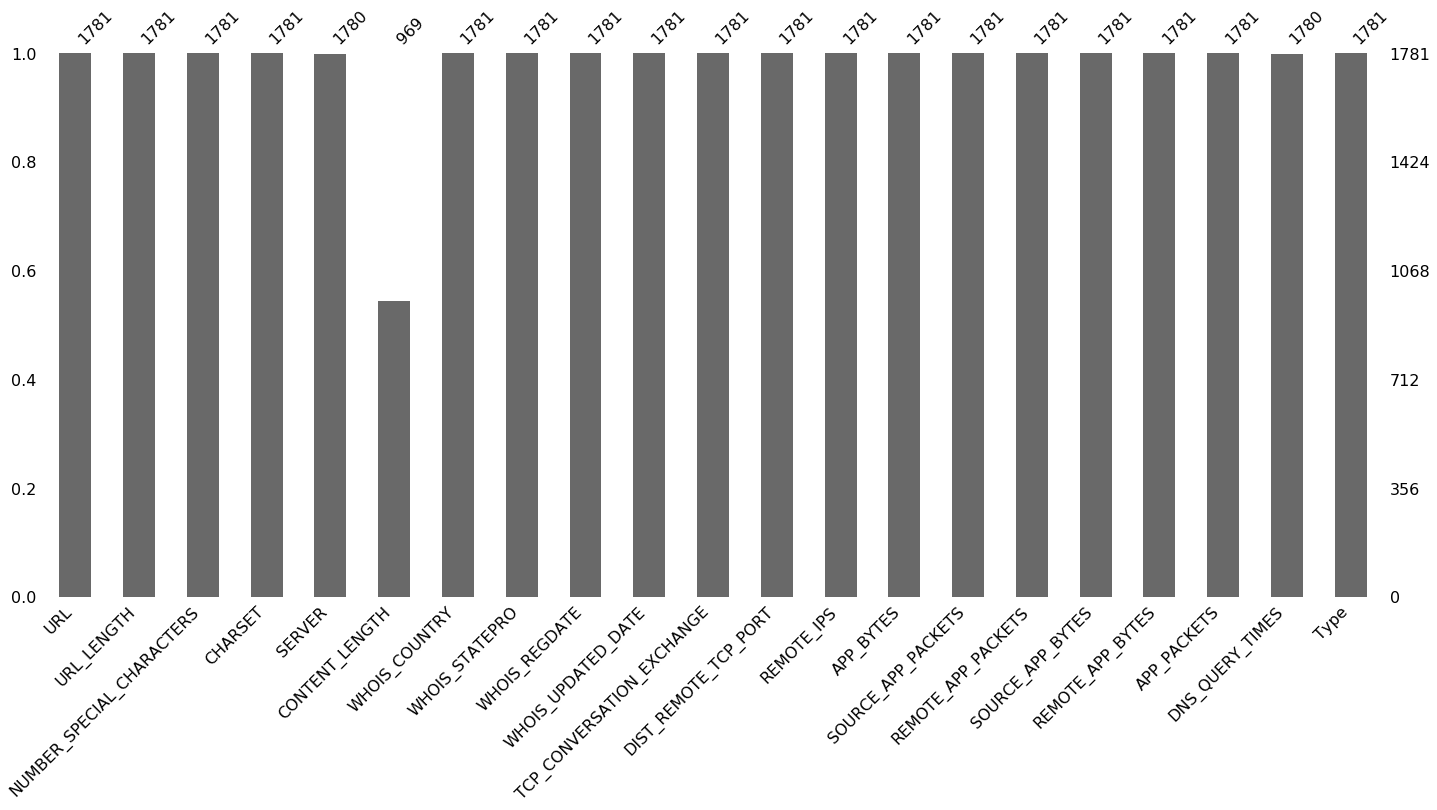

In [7]:
msno.bar(df)

The heatmap shows the correlation of missingness between every 2 columns. A valuve near -1 means if one variable appears then the other variable is very likely to be missing. A value near 0 means there is no dependence between the occurrnece of missing values of two variables. A value near 1 means if one variable appears then the other variable is very likely to be present.

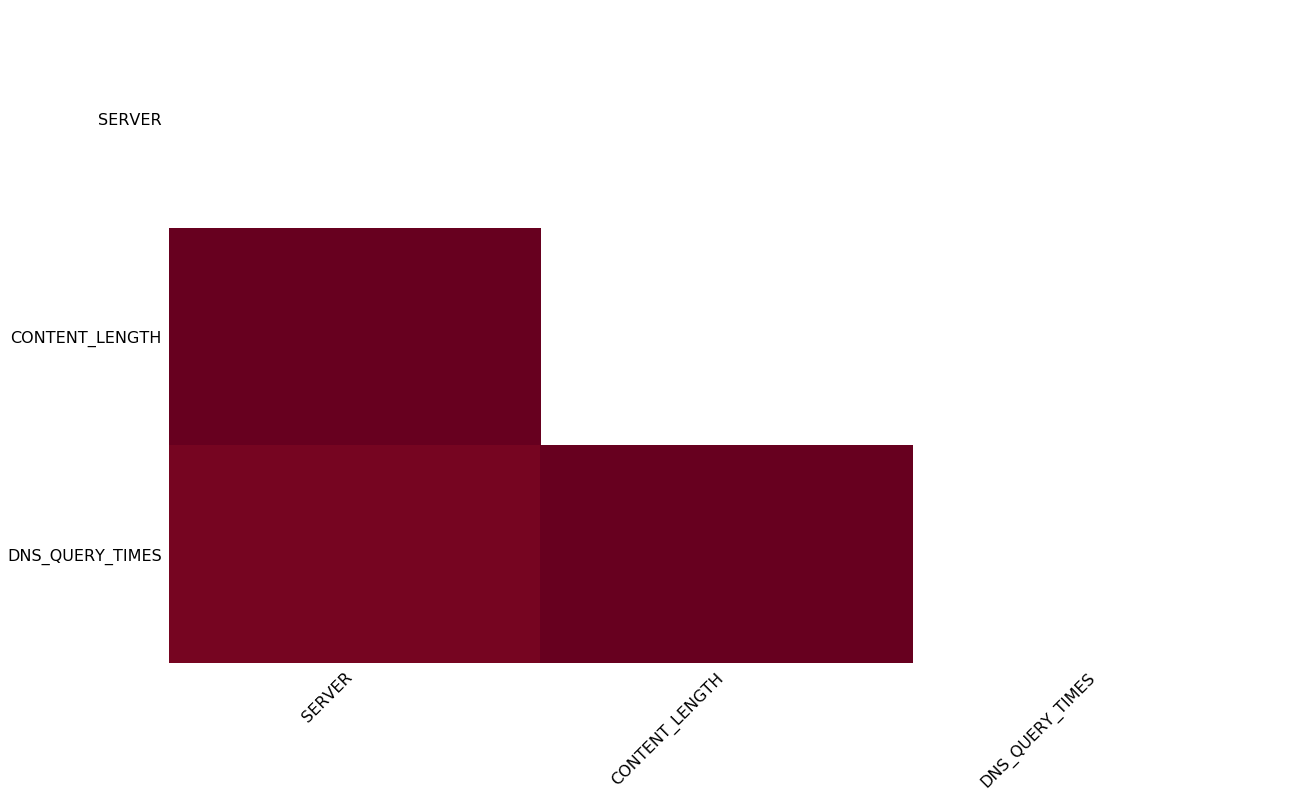

In [8]:
msno.heatmap(df)

While exploring the data, you make choose to add, remove and create variables. We will drop content length just for practice.

In [8]:
df = df.drop(columns=['CONTENT_LENGTH'])

While exploring data it is also important to look for outliers.

## Outliers, where are they, and why you should pay attention to them?

If you look at the number of occurrences of unique values within a dataset, one of the most common patterns is Zipf's law.

<img src="images/Zipf.png">

Zipf's Law: The highest occuring variable will have double the number of occurrences of the second highest occurring variable, triple the amount of the third and so on. 

The definition of an outlier will be different for every dataset. As a general rule of thumb, you may consider anything more than 3 standard deviations away from the mean as an outlier. 

<img src="images/pot_outlier.png">

Another potential look at an outlier, is also shown below:

<img src="images/pot_outlier2.png">

Typically, you can find outliers based on distirbution, this may or may not be as true in security. Outliers does not mean there is an intrusion, but could provide necessary insight into the ongoings of a system. For a first pass of EDA, it is recommended you check what the distribution of each feature.

### Exercise 3

1. Create three distribution plots of features for features of which you are interested?
2. Do you see any outliers?

Why should you worry about outliers?

Keeping outliers in your dataset may turn out in your model overfitting (being too accurate, not general enough). Removing all the outliers may result in your model being too generalised (it doesn't do well on anything out of the ordinary). Best to experiment with this iteratively to find the best way to deal with outliers.

## Getting more out of your data

Right now we have less than 15 features, but it is quite possible to have hundreds of features or too few features.

After you started to:
* Form an understanding
* Got an idea of the distirbutions
* Found some outliers and dealth with them

Feature engineering can be broken down into categories: adding, removing, and changing.

Let us talk about removing a feature. It is pretty easy to see we have a couple of columns with duplicate information.

In [10]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

Lets add another feature, we will examine to see if the number of `SOURCE_APP_PACKETS` is greater than or equal to 100.

In [11]:
def app_packet_cnt(a):
    if a >= 100:
        return 1
    else:
        return 0

We then apply it to each row of the dataframe.

In [12]:
df['100_app_pkt'] = df['SOURCE_APP_PACKETS'].apply(app_packet_cnt)

In [13]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,...,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,100_app_pkt
0,M0_109,16,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,7,...,2,700,9,10,1153,832,9,2.0,1,0
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,None,None,None,17,...,4,1230,17,19,1265,1230,17,0.0,0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,...,0,0,0,0,0,0,0,0.0,0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,...,3,3812,39,37,18784,4380,39,8.0,0,0
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,...,5,4278,61,62,129889,4586,61,4.0,0,0


### Exercise 4

* Take some time and familiarize yourself with this dataset
* Create/remove/change a feature you believe would be important to this dataset


### Feature Contribution

Feature contribution is a method of figuring out how much each feature influences a model. Knowing how much a feture contirbutes to a model can give you direction as to where to go next with your feature engineering.

<img src="images/zip_feat.png">

Removing features reduces the dimensionality of your data. It mean syour model has fewer connections to make to figure out the best wya of fitting the data. You might find rmeoving features means your model can get the same (or better) results on fewer data and in less time.

This is where we would begin to build our first model, before we get into models we will explore more concepts of looking a data (i.e. graph-based and time-series based). We will save the updated version of this dataset.

In [14]:
df.to_csv('data/updated_dataset.csv')

References:
1. https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e
2. https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184
3. https://github.com/ritikabhasker/Intro-to-EDA/blob/master/Intro_to_EDA.ipynb
4. https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
5. https://www.kdnuggets.com/2016/03/data-science-process.html